In [1]:
import sys
sys.path.append('..')
import ImpedanceSynthesiser as imps
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

reload(imps)

<module 'ImpedanceSynthesiser' from '../ImpedanceSynthesiser.pyc'>

In [19]:

l0 = 1.0
rad=.0075

temp = [-20,0,15,30]

ducts = []
legs=[]

t=temp[0]
duct = imps.Duct(world=world,losses=False)
duct.set_termination(imps.PerfectOpenEnd())
duct.append_element(imps.StraightDuct(length=l0,radius=rad))
ducts.append(duct)
legs.append('{} C (no loss)'.format(t))

for t in temp:
    world = imps.AcousticWorld(temp=t)
    duct = imps.Duct(world=world,losses=True)
    duct.set_termination(imps.PerfectOpenEnd())
    duct.append_element(imps.StraightDuct(length=l0,radius=rad))
    ducts.append(duct)
    legs.append('{} C'.format(t))




<IPython.core.display.Javascript object>


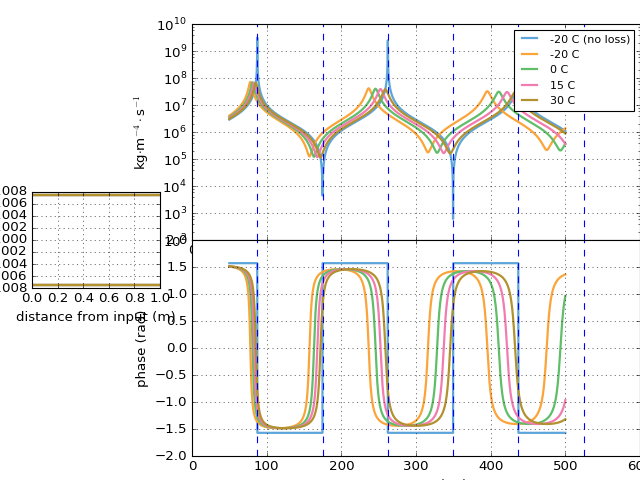

In [21]:
fvec = np.linspace(10,500,1000)

#fig,ax=pl.subplots(2,sharex=True)

ax = None
for duct in ducts:
    if ax is None:
        ax=duct.plot_report( fmax=max(fvec), npoints=2000)
    else:
        duct.plot_report(ax=ax, fmax=max(fvec), npoints=2000)
    
    
ax[1].legend(legs, fontsize=10 )
f=0
c=duct.speed_of_sound
while f < max(fvec):
    f+=c/(4*l0)
    ax[1].axvline(f,ls='--',lw=1)
    ax[2].axvline(f,ls='--',lw=1)

In [12]:

l0 = 1.0
rad=.0075

t=20
humid = [0,50,100]

ducts = []
legs=[]


for h in humid:
    world = imps.AcousticWorld(humid=h/100.)
    duct = imps.Duct(world=world,losses=True)
    duct.set_termination(imps.PerfectOpenEnd())
    duct.append_element(imps.StraightDuct(length=l0,radius=rad))
    ducts.append(duct)
    legs.append('{} %'.format(h))




<IPython.core.display.Javascript object>


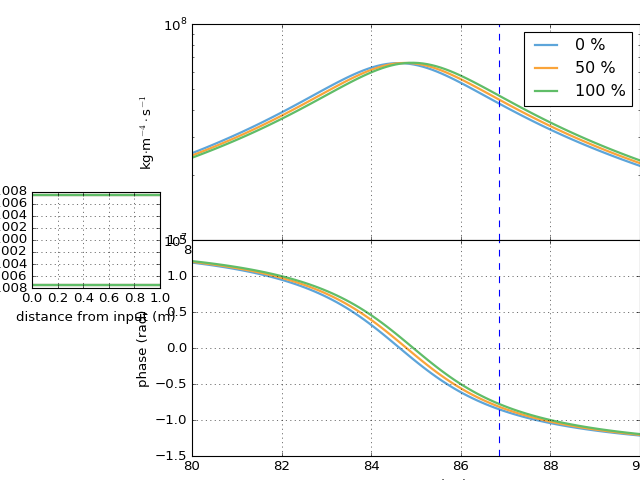

In [16]:
fvec = np.linspace(80,90,1000)

#fig,ax=pl.subplots(2,sharex=True)

ax = None
for duct in ducts:
    if ax is None:
        ax=duct.plot_report( fmin=80, fmax=90, npoints=100)
    else:
        duct.plot_report(ax=ax, fmin=80, fmax=90, npoints=100)
    
    
ax[1].legend(legs )
f=0
c=duct.speed_of_sound
f=c/(4*l0)
ax[1].axvline(f,ls='--',lw=1)
ax[2].axvline(f,ls='--',lw=1)